# Analyzing Patterns and Trends in the UFC

![Daniel Cormier vs Jon Jones](https://sportshub.cbsistatic.com/i/r/2016/06/22/581136a1-eda8-40bf-8bdc-57efce664316/resize/750x422/684274c7571763a29508e6e4e5ae8eb3/jones-cormier.jpg "Daniel Cormier (right) fighting Jon Jones (left)")


# Introduction

##### The goal of this project is to analyze UFC fight data from 2010 to 2024 to explore statistical patterns that occur in UFC fights, gain insight into how the UFC books their matches, and identify potential trends that can reveal more about what contributes to winning.

#### Questions we will be exploring:
- In terms of attributes other than weight, how do opposing fighters typically compare to each other?
- What are the most common types of fights?
- What are the most common ways a fight can finish?
- Which fighters tend to win more fights?
- Does a more aggressive wrestling/ground game really improve striking? If so, how much?

##### Dataset:
- "Ultimate UFC Dataset" on Kaggle
- Author: mdabbert
- Link: https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset
- Includes fights from 03/21/2010 to 12/07/2024

## 1. Import Libraries and Dataset

In [2142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2143]:
all_fights = pd.read_csv('ufc-master.csv')
all_fights

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2144]:
all_fights.shape

(6528, 118)

In [2145]:
print(list(all_fights.columns))

['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 

In [2146]:
all_fights.dtypes

RedFighter           object
BlueFighter          object
RedOdds             float64
BlueOdds            float64
RedExpectedValue    float64
                     ...   
BlueDecOdds         float64
RSubOdds            float64
BSubOdds            float64
RKOOdds             float64
BKOOdds             float64
Length: 118, dtype: object

In [2147]:
all_fights.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,...,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,...,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
std,277.225783,253.117416,85.891109,137.689177,0.577441,0.794303,1.406786,0.156327,20.315307,0.110787,...,4.307369,4.352773,1.007887,360.383418,250.750088,325.940028,601.826547,671.106177,426.563458,465.014634
min,-2100.000000,-1200.000000,4.761900,8.333300,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-400.000000
25%,-255.000000,-150.000000,39.215700,66.666700,3.000000,0.000000,0.000000,0.000000,3.880000,0.400000,...,5.000000,5.000000,1.000000,299.000000,170.000000,222.000000,439.750000,600.000000,225.000000,310.000000
50%,-150.000000,130.000000,66.666700,130.000000,3.000000,0.000000,0.000000,0.000000,9.280000,0.460000,...,8.000000,10.000000,3.000000,900.000000,250.000000,350.000000,750.000000,1000.000000,420.000000,525.000000
75%,130.000000,215.000000,130.000000,215.000000,3.000000,1.000000,1.000000,0.000000,32.666700,0.513000,...,12.000000,13.500000,3.000000,900.000000,400.000000,550.000000,1200.000000,1450.000000,700.000000,875.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2400.000000,3000.000000,4665.000000,5000.000000,4000.000000,4000.000000


## 2. Data Preparation
- Identify any duplicates
- Removing fights with missing or abnormal data
- Removing features that will not be used in analysis

In [2148]:
# Locate duplicates
all_fights.loc[all_fights.duplicated()]

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds


 In this data set, fights involving fighters making their UFC debut have 0's across their career statistics because they have no prior UFC fights from which to calculate statistics from. However, these fighters often have prior MMA experience from other organizations, so taking into account the statistical differences between opposing fighters in debut matches would be misleading. We remove debut matches for this reason.

In [2149]:
# Removing fights that involve fighters with no wins or losses
'''all_fights = all_fights[~(
    ((all_fights['RedWins'] == 0) & (all_fights['RedLosses'] == 0)) |
    ((all_fights['BlueWins'] == 0) & (all_fights['BlueLosses'] == 0)))]
    '''

"all_fights = all_fights[~(\n    ((all_fights['RedWins'] == 0) & (all_fights['RedLosses'] == 0)) |\n    ((all_fights['BlueWins'] == 0) & (all_fights['BlueLosses'] == 0)))]\n    "

The dataset includes abnormal values for career average significant strikes landed. We will remove any fights with significant strike averages exceeding the current record for career average significant strikes.

In [2150]:
# Removing fights with abnormal stats
all_fights = all_fights[~(
    (all_fights['RedAvgSigStrLanded'] > 8.66) |
    (all_fights['BlueAvgSigStrLanded'] > 8.66))]

In [2151]:
# Uniting Women and Men's Weight Class
all_fights['WeightClass'] = all_fights['WeightClass'].str.replace("Women's ", "", regex=False)

/var/folders/76/98xj4m9j2133gv8vv63lkhhh0000gn/T/ipykernel_76577/2341337912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_fights['WeightClass'] = all_fights['WeightClass'].str.replace("Women's ", "", regex=False)


In [2152]:
# Creating separate dataframe for analysis, removing columns that won't be used in analysis/prediction.

analysis_df = all_fights[['RedFighter', 'BlueFighter', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
                          'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 
                          'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgTDPct', 'BlueAvgTDLanded', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgTDPct', 'RedAvgTDLanded',
                          'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 
                          'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif',
                          'Finish', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs']
]

In [2153]:
# For colummns with null values, find ratio of null entries to total entries
def print_null_ratios(df):
    for col in df.columns:
        total_nulls = df[col].isnull().sum()
        ratio = total_nulls / df.shape[0]
        if total_nulls > 0:
            print(f"{col:<25} {total_nulls:<15} {ratio:<8.3f}")


In [2154]:
# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(analysis_df)


Column:                   Total Nulls:    Ratio:  
BlueStance                3               0.001   
BlueAvgSigStrLanded       378             0.126   
BlueAvgSigStrPct          269             0.090   
BlueAvgTDPct              290             0.097   
BlueAvgTDLanded           281             0.094   
RedAvgSigStrLanded        355             0.118   
RedAvgSigStrPct           257             0.086   
RedAvgTDPct               267             0.089   
RedAvgTDLanded            257             0.086   
Finish                    84              0.028   
FinishRound               457             0.152   
FinishRoundTime           457             0.152   
TotalFightTimeSecs        457             0.152   


In [2155]:
# Dropping Rows with Null Values
analysis_df = analysis_df.dropna()
print(f"Analysis dataframe shape after dropping nulls: {analysis_df.shape}")

Analysis dataframe shape after dropping nulls: (2198, 72)


In [2156]:
# Removing fights that ended in a disqualification or were overturned then
# dropping method column
analysis_df = analysis_df[~analysis_df['Finish'].isin(['DQ', 'Overturned'])]

## 3. Exploratory Data Analysis

In [2157]:
blue_win_percentage = (analysis_df['Winner'] == 'Blue').sum() / analysis_df.shape[0]
blue_title_win_percentage = ((analysis_df['TitleBout']) & (analysis_df['Winner'] == 'Blue')).sum() / analysis_df['TitleBout'].sum()

print(f"Total Fights: {analysis_df.shape[0]}")
print(f"Total Title Fights: {analysis_df['TitleBout'].sum()}")

print(f"Blue Win Percentage: {blue_win_percentage:.3f}")
print(f"Blue Win Percentage (Title Fights): {blue_title_win_percentage:.3f}")

Total Fights: 2192
Total Title Fights: 90
Blue Win Percentage: 0.422
Blue Win Percentage (Title Fights): 0.378


In [2158]:
# Combine red fighter's age and blue fighter's age into a single series for plotting
all_ages = pd.concat([analysis_df['RedAge'], analysis_df['BlueAge']], ignore_index=True)
print(f"Average Fighter Age: {all_ages.mean():.2f}")

Average Fighter Age: 30.83


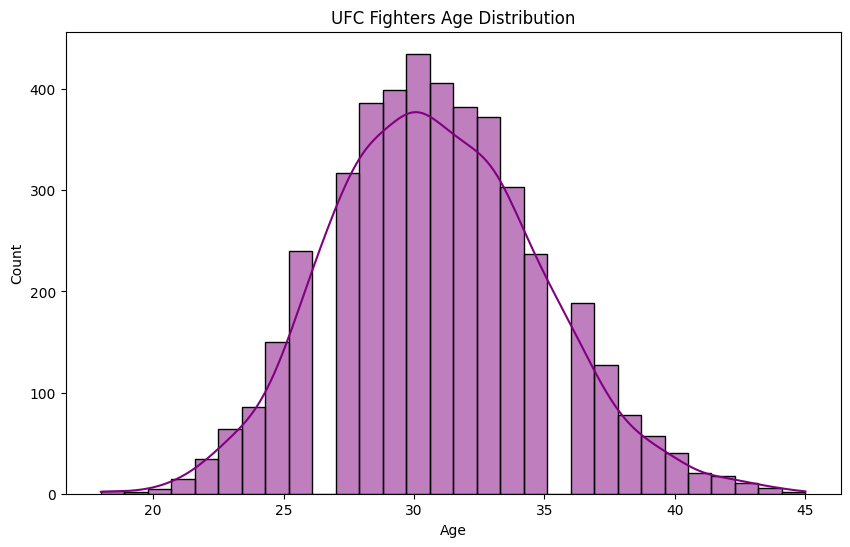

In [2159]:
# Plot the age distribution
plt.figure(figsize=(10,6))
sns.histplot(all_ages, bins=30, kde=True, color='purple')
plt.title('UFC Fighters Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

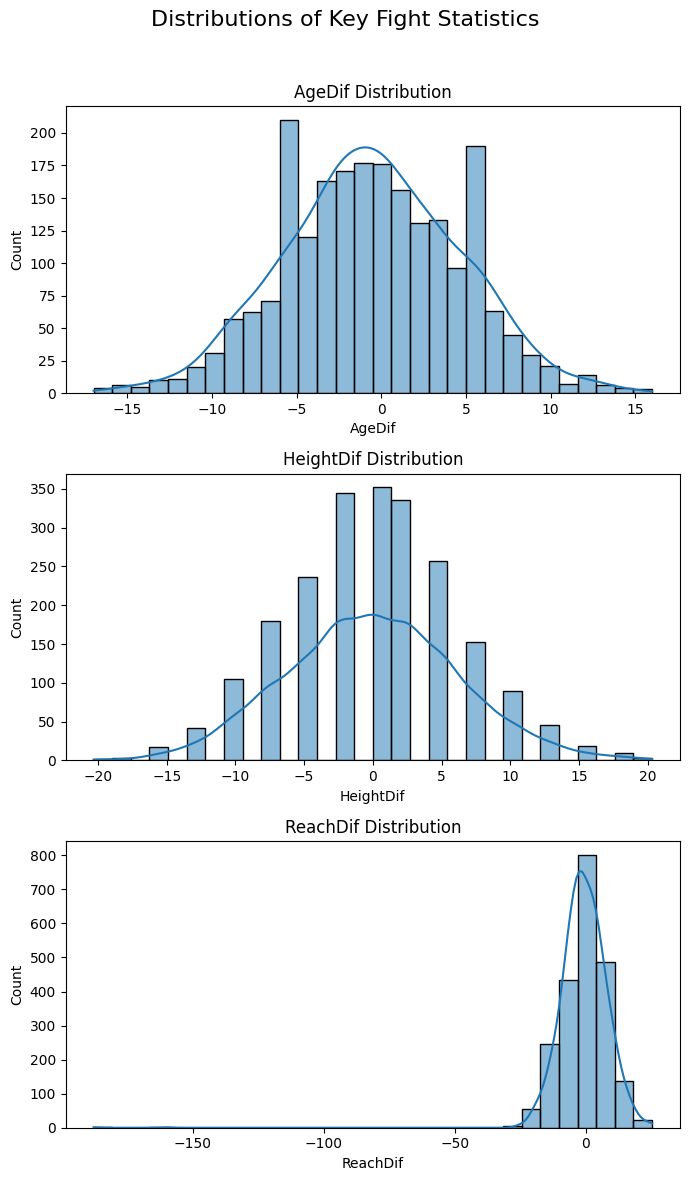

In [2160]:
key_columns = ['AgeDif', 'HeightDif', 'ReachDif'] 
fig, axes = plt.subplots(3, 1, figsize=(7, 12)) 
fig.suptitle('Distributions of Key Fight Statistics', fontsize=16)

for ax, col in zip(axes.flatten(), key_columns):
    sns.histplot(analysis_df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

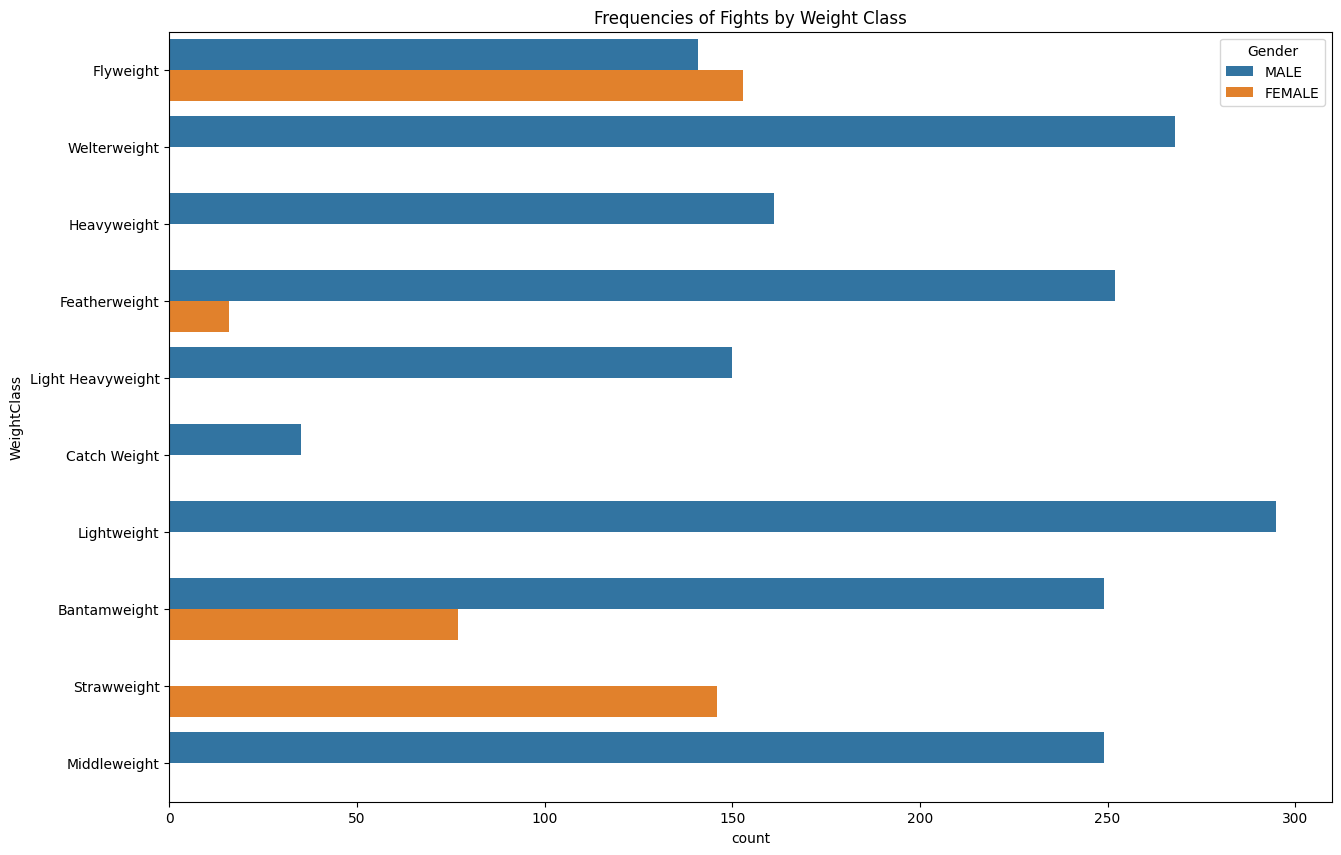

In [2161]:
plt.figure(figsize=(15,10))
sns.countplot(y='WeightClass', hue='Gender', data=analysis_df)
plt.title("Frequencies of Fights by Weight Class")
plt.show()

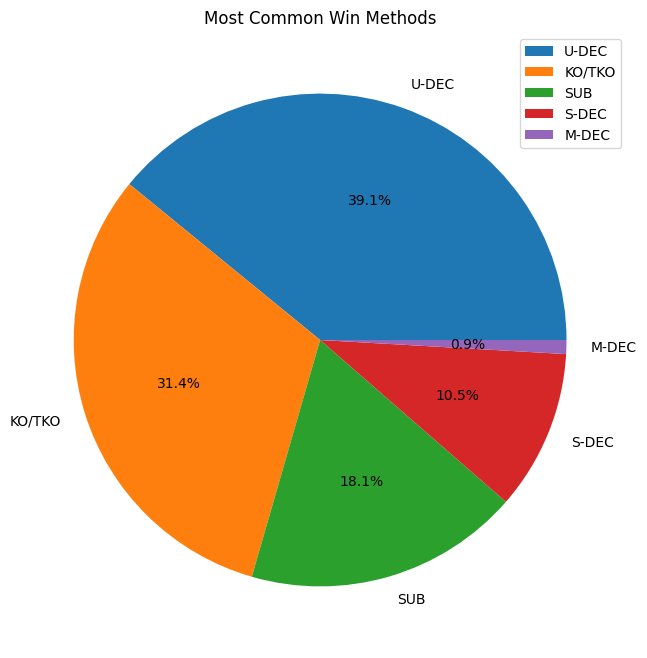

In [2162]:
win_methods = analysis_df['Finish'].value_counts()
plt.figure(figsize=(8, 8))
win_methods.plot(kind='pie', autopct='%1.1f%%', legend=True)
plt.title('Most Common Win Methods')
plt.ylabel('')
plt.show()


Text(0.5, 1.0, 'Most Common Fighting Stance Among Winners')

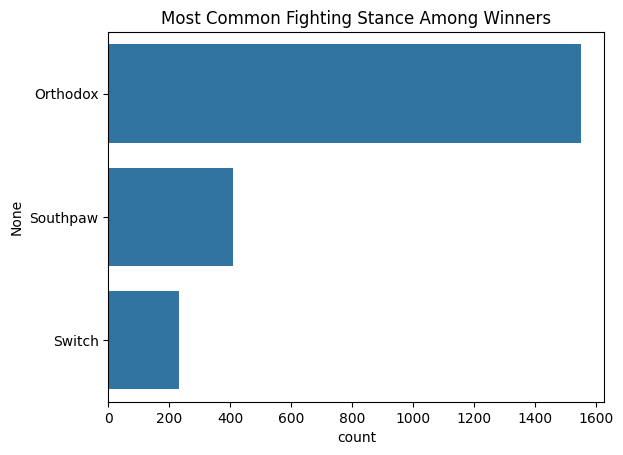

In [2163]:
winner_stance = np.where(
    analysis_df['Winner'] == 'Red',
    analysis_df['RedStance'],
    analysis_df['BlueStance']
)
winner_stance = pd.Series(winner_stance, index=analysis_df.index)

sns.countplot(y=winner_stance)
plt.title("Most Common Fighting Stance Among Winners")

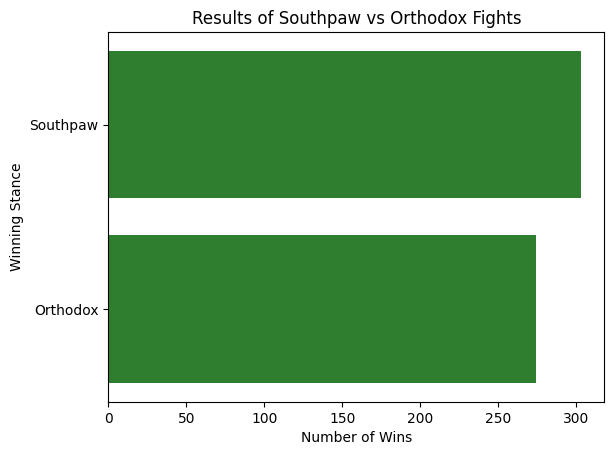

In [2164]:
filtered_df = analysis_df[
    ((analysis_df['RedStance'] == 'Southpaw') &
    (analysis_df['BlueStance'] == 'Orthodox')) |
    ((analysis_df['RedStance'] == 'Orthodox') &
    (analysis_df['BlueStance'] == 'Southpaw'))
]
other = np.where(
    filtered_df['Winner'] == 'Red',
    filtered_df['RedStance'],
    filtered_df['BlueStance']
)

other = pd.Series(other, index=filtered_df.index)

ax = sns.countplot(y=other, color='forestgreen')
ax.set_xlabel("Number of Wins")
ax.set_ylabel("Winning Stance")
plt.title("Results of Southpaw vs Orthodox Fights")
plt.show()

## Exploring Knockouts

In [2165]:
analysis_df_no_catch = analysis_df[analysis_df['WeightClass'] != 'Catch Weight']

Text(0.5, 1.0, 'Number of Fights Ending in KO/TKO by Finish Round')

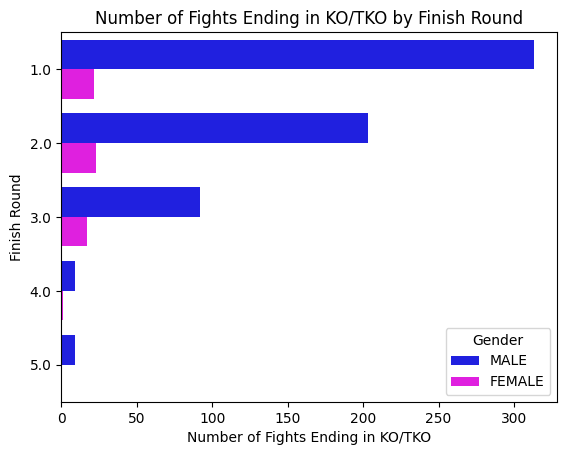

In [2166]:
# All fights ending in KO/TKO
ko_fights = analysis_df[analysis_df['Finish'] == 'KO/TKO']

sns.countplot(
    data=ko_fights,
    y='FinishRound',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}
)

plt.xlabel('Number of Fights Ending in KO/TKO')
plt.ylabel('Finish Round')
plt.title('Number of Fights Ending in KO/TKO by Finish Round')

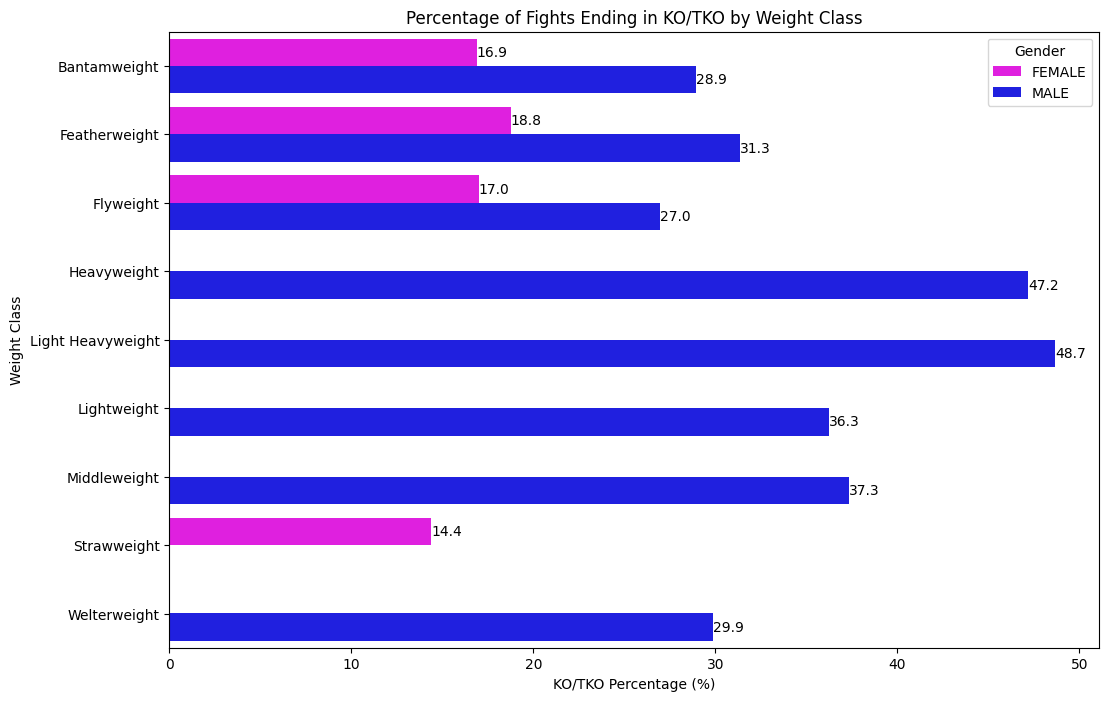

In [2167]:
# Calculate total fights per weight class and gender
total_fights_per_class_gender = analysis_df_no_catch.groupby(['WeightClass', 'Gender']).size()

# Calculate KO/TKO fights per weight class and gender
ko_fights_per_class_gender = analysis_df_no_catch[analysis_df_no_catch['Finish'] == 'KO/TKO'].groupby(['WeightClass', 'Gender']).size()
# Calculate percentage
percent_ko_gender = (ko_fights_per_class_gender / total_fights_per_class_gender * 100).fillna(0).reset_index(name='KO/TKO %')

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=percent_ko_gender,
    y='WeightClass',
    x='KO/TKO %',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}

)
plt.xlabel('KO/TKO Percentage (%)')
plt.ylabel('Weight Class')
plt.title('Percentage of Fights Ending in KO/TKO by Weight Class')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

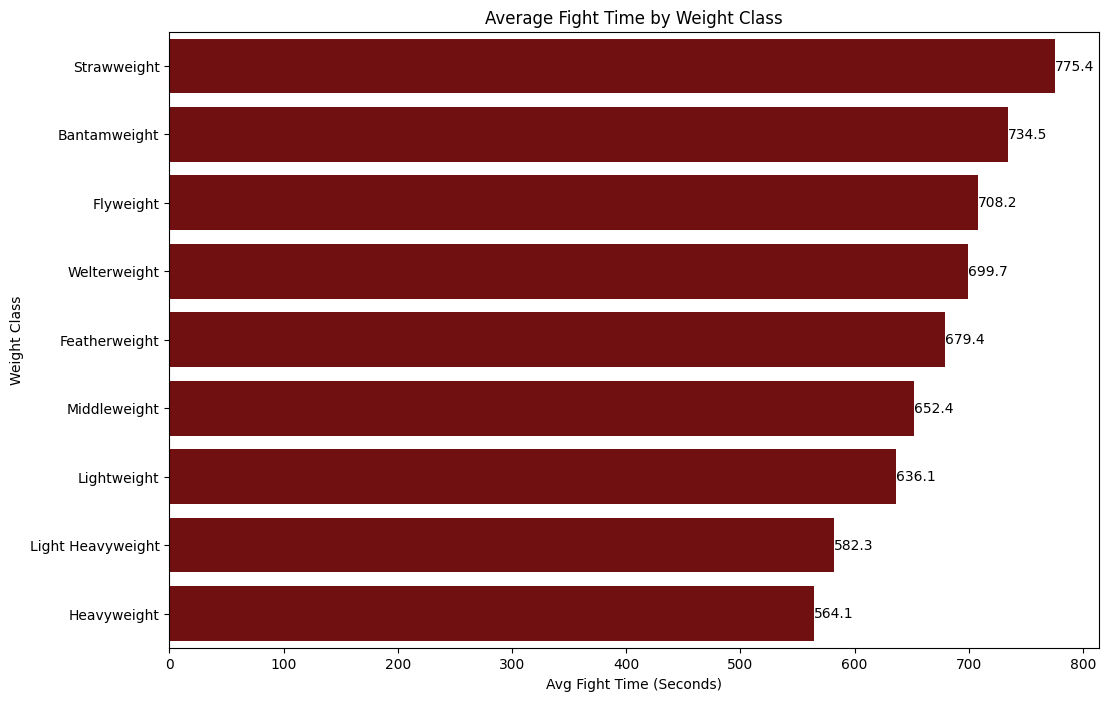

In [2168]:
fight_class_times = analysis_df_no_catch
fight_class_times = fight_class_times[['WeightClass', 'TotalFightTimeSecs']]
fight_class_times = fight_class_times.groupby(['WeightClass']).mean()

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=fight_class_times,
    y='WeightClass',
    x='TotalFightTimeSecs', color='maroon',
    order=fight_class_times.sort_values('TotalFightTimeSecs', ascending=False).index
)

plt.xlabel('Avg Fight Time (Seconds)')
plt.ylabel('Weight Class')
plt.title('Average Fight Time by Weight Class')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()


## Exploring Submissions

Text(0.5, 1.0, 'Number of Fights Ending in Submission by Finish Round')

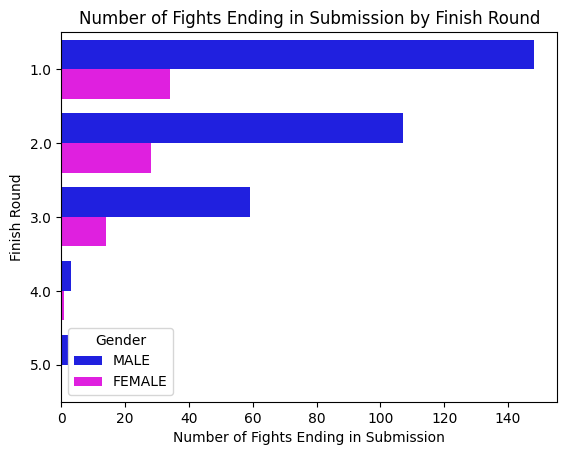

In [2169]:
# All fights ending in Submission
sub_fights = analysis_df[analysis_df['Finish'] == 'SUB']

sns.countplot(
    data=sub_fights,
    y='FinishRound',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}
)
plt.xlabel('Number of Fights Ending in Submission')
plt.ylabel('Finish Round')
plt.title('Number of Fights Ending in Submission by Finish Round')

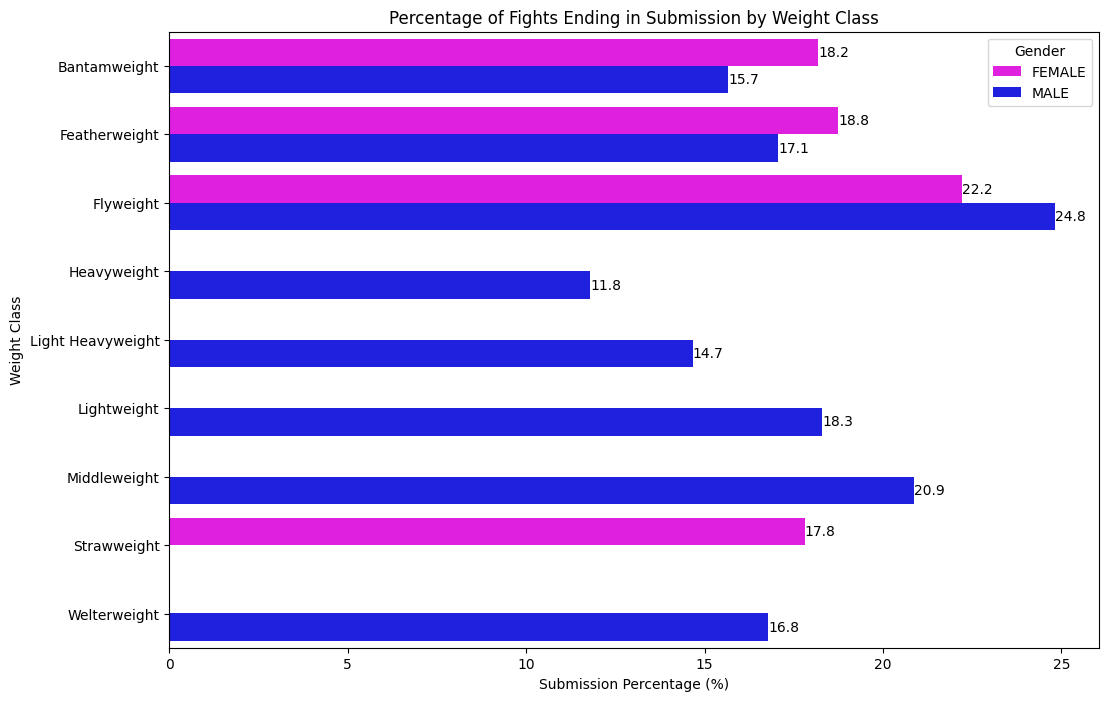

In [2170]:
# Calculate submission fights per weight class and gender
sub_fights_per_class_gender = analysis_df_no_catch[analysis_df_no_catch['Finish'] == 'SUB'].groupby(['WeightClass', 'Gender']).size()

percent_sub_gender = (sub_fights_per_class_gender / total_fights_per_class_gender * 100).fillna(0).reset_index(name='SUB %')

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=percent_sub_gender,
    y='WeightClass',
    x='SUB %',
    hue='Gender',
    palette={'MALE': 'blue', 'FEMALE': 'magenta'}

)
plt.xlabel('Submission Percentage (%)')
plt.ylabel('Weight Class')
plt.title('Percentage of Fights Ending in Submission by Weight Class')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

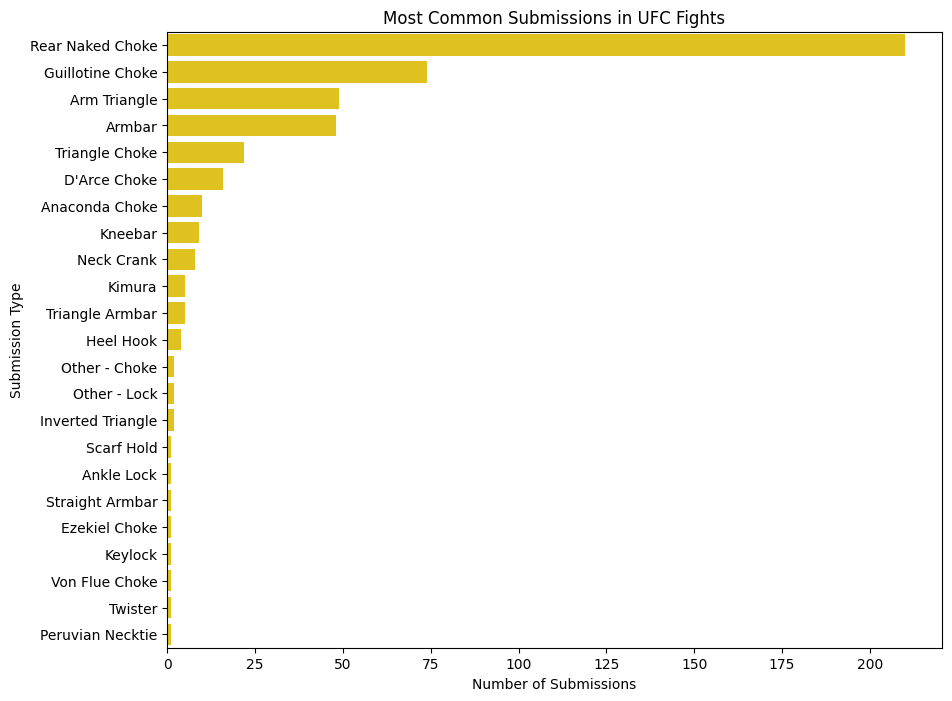

In [2171]:
all_finishes = all_fights['FinishDetails'].dropna()
exclude = ['Elbows', 'Punches', 'Punch', 'Kick', 'Elbow', 'Knee', 'Knees', 'Flying Knee', 'Slam', 'Spinning Back Fist', 'Spinning Back Elbow', 'Kicks', 'Spinning Back Kick']
all_subs = all_finishes[~all_finishes.isin(exclude)]

plt.figure(figsize=(10, 8))
sns.countplot(y=all_subs, color='gold', order=all_subs.value_counts().index)
plt.title('Most Common Submissions in UFC Fights')
plt.xlabel('Number of Submissions')
plt.ylabel('Submission Type')
plt.show()

In [2172]:
analysis_df['RedSigStrAttPerMin'] = analysis_df['RedAvgSigStrLanded'] / analysis_df['RedAvgSigStrPct']
analysis_df['BlueSigStrAttPerMin'] = analysis_df['BlueAvgSigStrLanded'] / analysis_df['BlueAvgSigStrPct']

red_df = analysis_df[['RedFighter', 'RedSigStrAttPerMin', 'RedAvgSigStrPct', 'RedAvgTDLanded', 'RedAvgSigStrLanded']]
blue_df = analysis_df[['BlueFighter', 'BlueSigStrAttPerMin', 'BlueAvgSigStrPct', 'BlueAvgTDLanded', 'BlueAvgSigStrLanded' ]]
red_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDLanded', 'AvgSigStrLanded']
blue_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDLanded', 'AvgSigStrLanded']
fighters_df = pd.concat([red_df, blue_df], ignore_index=True)
fighters_df = fighters_df[fighters_df['TDLanded'] > 0]
fighters_df['TD Landed Per Min'] = fighters_df['TDLanded'] / 15



In [2173]:
mean = fighters_df['SigStrAttPerMin'].mean()
std = fighters_df['SigStrAttPerMin'].std()
anomalies = fighters_df['SigStrAttPerMin'][np.abs((fighters_df['SigStrAttPerMin'] - mean) / std) > 2]

In [2174]:
fighters_df[fighters_df['SigStrAttPerMin'].isin(anomalies)]

,Fighter,SigStrAttPerMin,SigStrPct,TDLanded,AvgSigStrLanded,TD Landed Per Min
91,Daniel Rodriguez,15.306122,0.49,0.5900,7.5000,0.039333
127,Daniel Zellhuber,15.650000,0.40,0.1800,6.2600,0.012000
164,Casey O'Neill,15.173077,0.52,1.4500,7.8900,0.096667
222,Joshua Van,15.830189,0.53,1.6200,8.3900,0.108000
277,Sean Strickland,14.309524,0.42,0.7800,6.0100,0.052000
...,...,...,...,...,...,...
4325,Irene Aldana,16.210526,0.38,0.2800,6.1600,0.018667
4328,Gabriel Silva,1.060000,0.50,1.0000,0.5300,0.066667
4329,Jin Soo Son,14.166667,0.36,1.5000,5.1000,0.100000
4330,Felipe Colares,2.690476,0.42,2.0000,1.1300,0.133333


In [2175]:
fighters_df = fighters_df[~fighters_df['SigStrAttPerMin'].isin(anomalies)] 

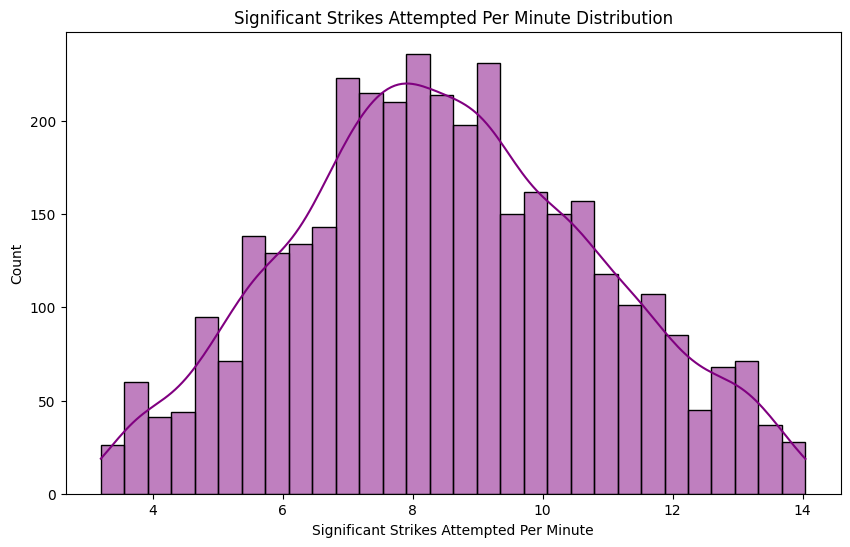

In [2176]:
plt.figure(figsize=(10,6))
sns.histplot(fighters_df['SigStrAttPerMin'], bins=30, kde=True, color='purple')
plt.title('Significant Strikes Attempted Per Minute Distribution')
plt.xlabel('Significant Strikes Attempted Per Minute')
plt.ylabel('Count')
plt.show()

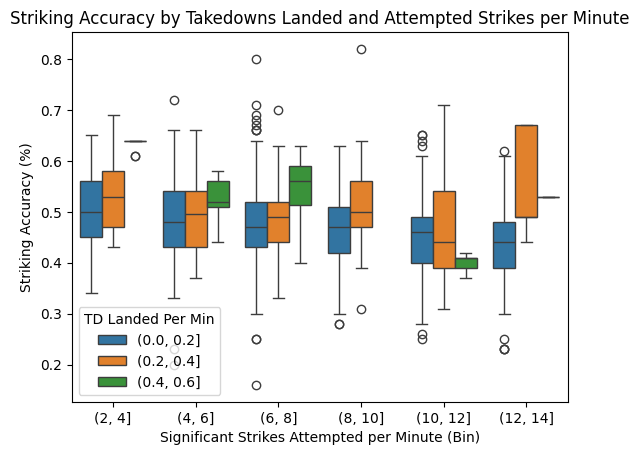

<Figure size 2000x3000 with 0 Axes>

In [2177]:

# Bin by SigStrAttPerMin
fighters_df['AttBin'] = pd.cut(fighters_df['SigStrAttPerMin'], bins=[2, 4, 6, 8, 10, 12, 14])

# Compare striking accuracy by takedown groups within bins
sns.boxplot(x='AttBin', y='SigStrPct', hue=pd.cut(fighters_df['TD Landed Per Min'], bins=[0, 0.2, 0.4, 0.6]), data=fighters_df)
plt.title('Striking Accuracy by Takedowns Landed and Attempted Strikes per Minute')
plt.xlabel('Significant Strikes Attempted per Minute (Bin)')
plt.ylabel('Striking Accuracy (%)')
plt.figure(figsize=(20,30))
plt.show()


/var/folders/76/98xj4m9j2133gv8vv63lkhhh0000gn/T/ipykernel_76577/3043116191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_stats['WinnerIsBlue'] = all_stats['Winner'] == 'Blue'
/var/folders/76/98xj4m9j2133gv8vv63lkhhh0000gn/T/ipykernel_76577/3043116191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_stats.drop(columns=['Winner'], inplace=True)


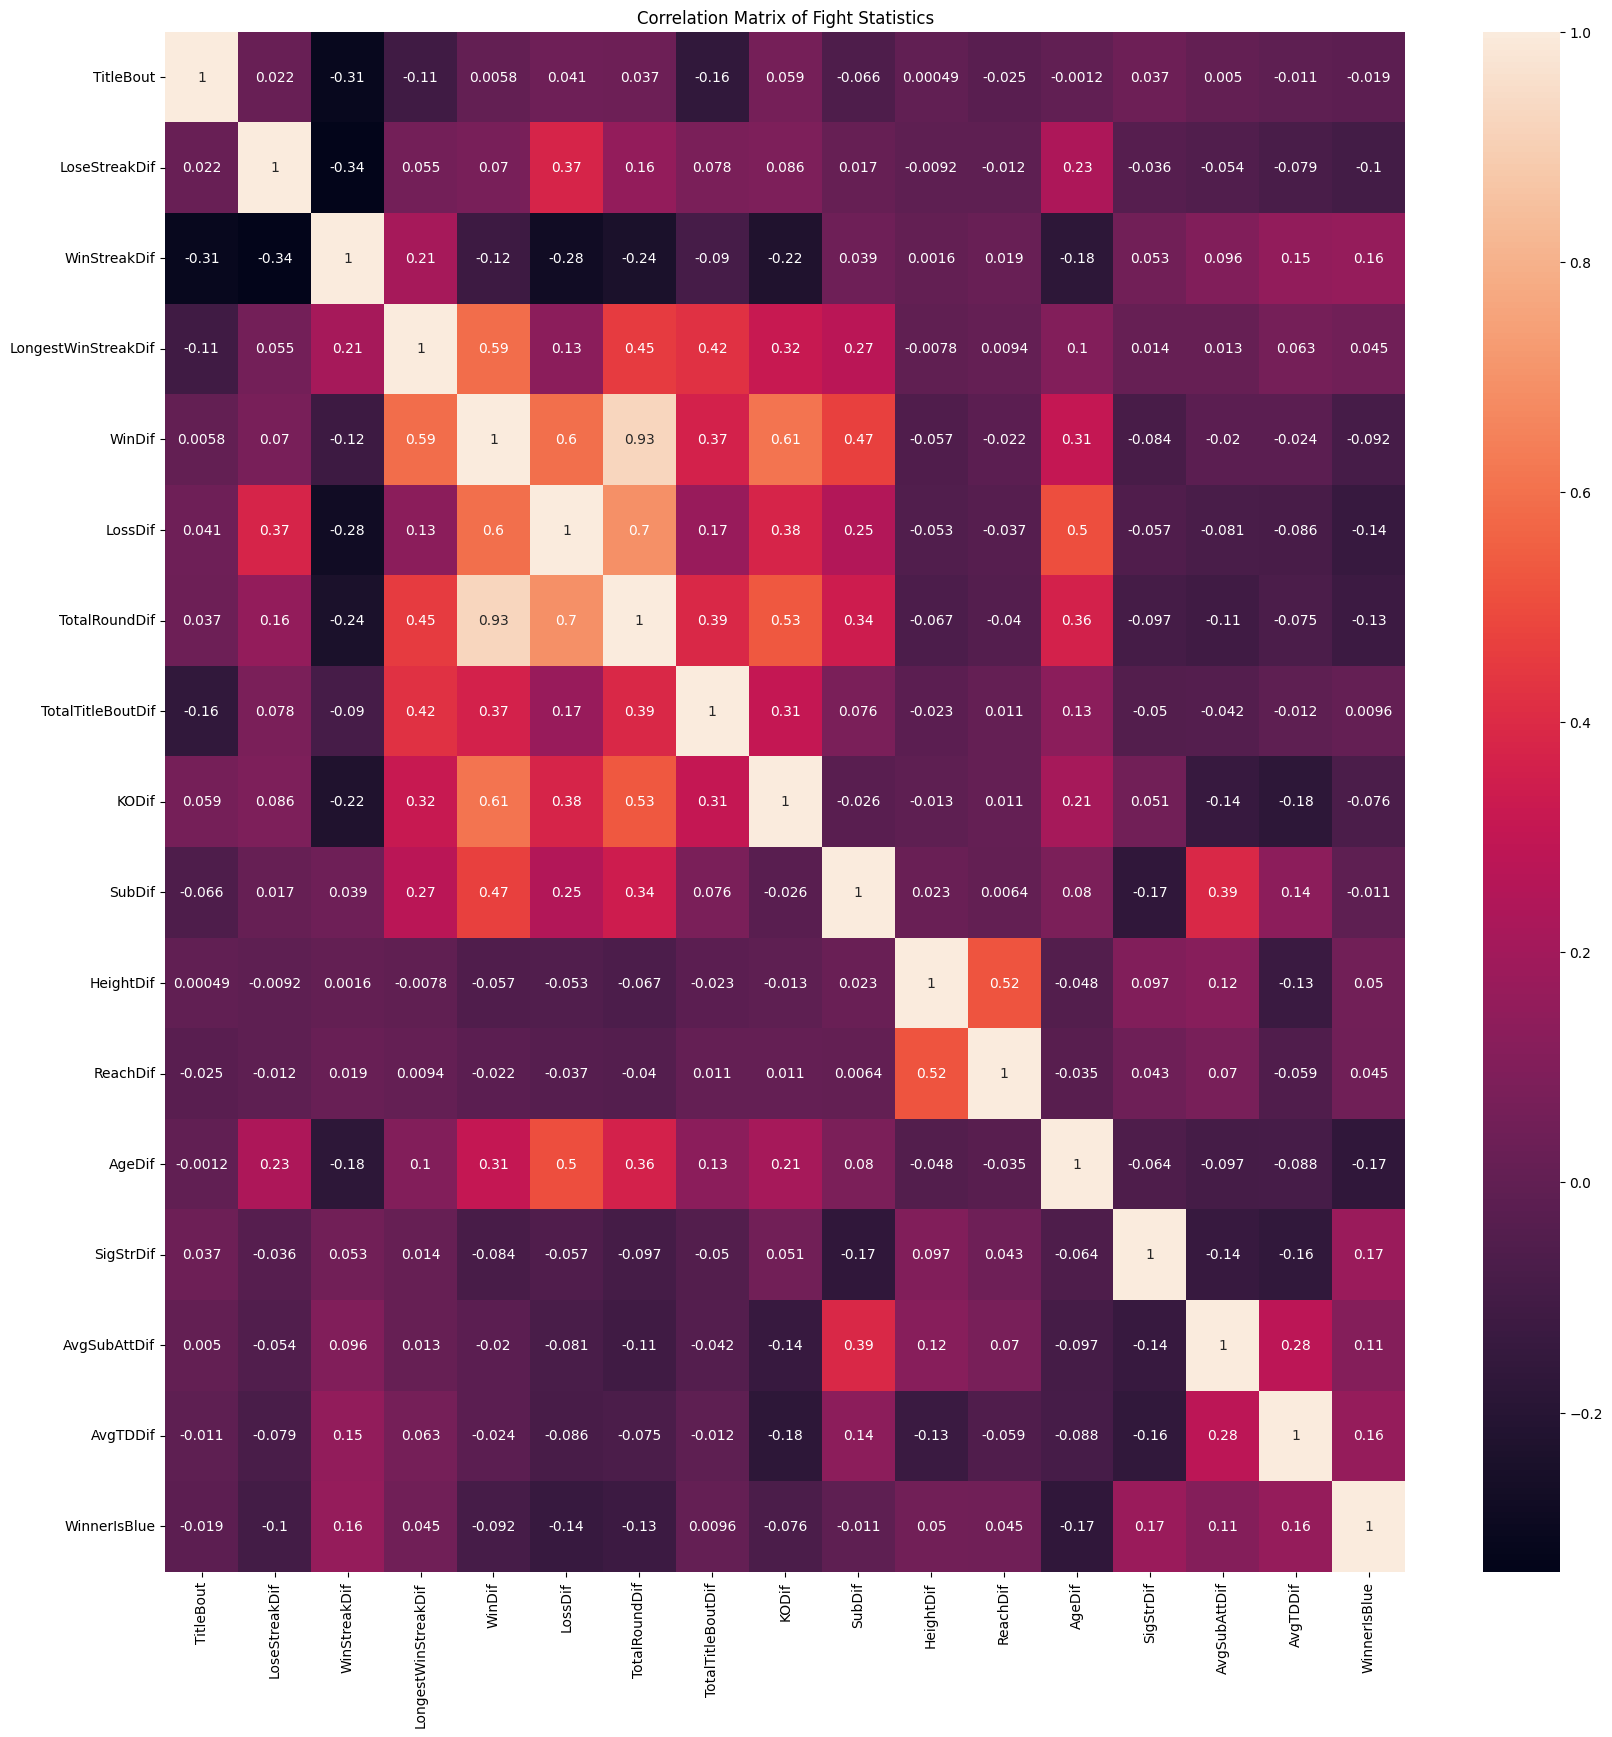

In [2178]:
all_stats = analysis_df[['Winner', 'TitleBout', 'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif']]
all_stats['WinnerIsBlue'] = all_stats['Winner'] == 'Blue'
all_stats.drop(columns=['Winner'], inplace=True)
correlation = all_stats.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix of Fight Statistics')
plt.show()

## 4. Prediction/Modeling

In [2179]:
print(all_fights.columns)

Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'FinishDetails', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs',
       'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds',
       'BKOOdds'],
      dtype='object', length=118)


In [2180]:
prediction_df = all_fights[['RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Winner', 'TitleBout',
       'Gender', 'RedStance', 'BlueStance', 'LoseStreakDif',
       'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif',
       'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif',
       'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif']]

In [2181]:
prediction_df

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Winner,TitleBout,Gender,RedStance,BlueStance,LoseStreakDif,...,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif
0,-250.0,215.0,40.0000,215.0000,Red,True,MALE,Orthodox,Orthodox,0,...,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61
1,-210.0,295.0,47.6190,295.0000,Red,False,MALE,Orthodox,Orthodox,0,...,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72
2,-380.0,300.0,26.3158,300.0000,Red,False,MALE,Orthodox,Orthodox,0,...,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13
3,-950.0,625.0,10.5263,625.0000,Red,False,MALE,Southpaw,Southpaw,1,...,-15,0,0,0,-2.54,0.00,6,1.44,-1.1,-2.98
4,-130.0,110.0,76.9231,110.0000,Blue,False,MALE,Orthodox,Orthodox,0,...,-2,0,3,-2,2.54,-5.08,-3,-1.84,-0.2,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,155.0,-175.0,155.0000,57.1429,Blue,False,MALE,Orthodox,Southpaw,0,...,0,0,0,0,7.62,7.62,0,0.00,0.0,0.00
6451,-160.0,140.0,62.5000,140.0000,Red,False,MALE,Orthodox,Orthodox,0,...,0,0,0,0,2.54,-1.27,-3,0.00,0.0,0.00
6456,170.0,-185.0,170.0000,54.0541,Red,False,MALE,Orthodox,Orthodox,0,...,-1,0,0,0,-5.08,-2.54,-5,0.00,0.0,0.00
6484,-255.0,215.0,39.2157,215.0000,Blue,False,MALE,Southpaw,Orthodox,0,...,-3,0,0,-2,2.54,10.16,0,3.25,-0.5,-0.25


In [2182]:
prediction_df = pd.get_dummies(prediction_df, prefix=['Winner', 'Gender', 'RedStance', 'BlueStance'])
prediction_df.dropna(inplace=True)

In [2183]:
prediction_df.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,-103.213512,41.191113,99.105598,153.552544,-0.046243,-0.114162,-0.692197,-1.548772,-0.613078,-5.970014,-0.201228,-0.524566,-0.328757,-0.291806,-0.669133,-0.517702,-0.169351,-0.081186,-0.076846
std,275.917861,248.717428,85.834393,127.580750,1.048530,2.046436,2.061027,4.632244,3.468095,21.301343,1.694068,2.276538,1.991927,7.192228,10.119224,5.196296,1.870593,0.962261,1.853182
min,-2100.000000,-1100.000000,4.761900,9.090900,-6.000000,-18.000000,-12.000000,-28.000000,-19.000000,-448.000000,-15.000000,-21.000000,-16.000000,-187.960000,-187.960000,-17.000000,-8.333300,-8.400000,-8.400000
25%,-240.000000,-155.000000,41.666700,64.516100,0.000000,-1.000000,-2.000000,-3.000000,-2.000000,-13.000000,0.000000,-1.000000,-1.000000,-5.080000,-5.080000,-4.000000,-1.180000,-0.400000,-0.990000
50%,-140.000000,120.000000,71.428600,120.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
75%,132.000000,200.000000,132.000000,200.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.540000,5.080000,3.000000,0.812500,0.300000,0.830000
max,700.000000,1100.000000,700.000000,1100.000000,5.000000,10.000000,14.000000,23.000000,16.000000,87.000000,15.000000,14.000000,10.000000,22.860000,25.400000,16.000000,8.540000,7.800000,10.860000


In [2184]:
# Separate features and target
target = prediction_df['Winner_Blue']
features = prediction_df.drop(columns=['Winner_Blue', 'Winner_Red'])
#features = features.dropna()
#target = target.loc[features.index]
features.shape

(2768, 29)

In [2185]:
# Normalize the data
scalar = StandardScaler()
scaled_features = scalar.fit_transform(features)

In [2186]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.35, random_state=42, stratify=target)

In [2187]:
lr = LogisticRegression()

# Train model on training data
lr.fit(X_train, y_train)

# Make predictions on test data
target_pred = lr.predict(X_test)


In [2188]:
target_pred

array([ True,  True, False,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,

In [2189]:
acc = accuracy_score(y_test, target_pred)
print(f"Logistic Regression Model Accuracy: {acc:.3f}")

Logistic Regression Model Accuracy: 0.666


In [2190]:
print(classification_report(y_test, target_pred))

              precision    recall  f1-score   support

       False       0.69      0.79      0.73       566
        True       0.62      0.49      0.55       403

    accuracy                           0.67       969
   macro avg       0.65      0.64      0.64       969
weighted avg       0.66      0.67      0.66       969

